Using the files/flare from xrs1516_example work out the T,EM

*25-05-2022 IGH

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sunpy import timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a

import goesxrs_temp as gtem

# Just setup plot fonts
plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular"})

In [2]:
trange=a.Time("2018-06-21 01:11","2018-06-21 01:20")
outdir='/Users/iain/sunpy/data/'
fn15=outdir+"sci_gxrs-l2-irrad_g15_d20180621_v0-0-0.nc"
fn16=outdir+"sci_xrsf-l2-flx1s_g16_d20180621_v2-1-0.nc"
# print(fn15,fn16)
g15 = ts.TimeSeries(fn15, concatenate=True)
g16 = ts.TimeSeries(fn16, concatenate=True)
tg15=g15.truncate(trange.start.iso,trange.end.iso)
tg16=g16.truncate(trange.start.iso,trange.end.iso)

tg15_tims=tg15.index
tg15_x05=tg15.quantity("xrsa").value
tg15_x18=tg15.quantity("xrsb").value
tg16_tims=tg16.index
tg16_x05=tg16.quantity("xrsa").value
tg16_x18=tg16.quantity("xrsb").value

In [3]:
tbck=a.Time("2018-06-21 01:05","2018-06-21 01:10")
tbckg15=g15.truncate(tbck.start.iso,tbck.end.iso)
bck15_05=np.mean(tbckg15.quantity("xrsa").value)
bck15_18=np.mean(tbckg15.quantity("xrsb").value)
print(bck15_05,bck15_18)
tbckg16=g16.truncate(tbck.start.iso,tbck.end.iso)
bck16_05=np.mean(tbckg16.quantity("xrsa").value)
bck16_18=np.mean(tbckg16.quantity("xrsb").value)
print(bck16_05,bck16_18)
# # What about median over background time as GOES16 1s noisy
# bck16_05=np.median(tbckg16.quantity("xrsa").value)
# bck16_18=np.median(tbckg16.quantity("xrsb").value)
# print(bck16_05,bck16_18)

1.258239e-09 1.2914711e-07
1.9427029e-08 1.5808354e-07


In [4]:
tmk15, em15=gtem.get_tem(tg15_x18-bck15_18,tg15_x05-bck15_05,sat=15)
tmk16, em16=gtem.get_tem(tg16_x18-bck16_18,tg16_x05-bck16_05,sat=16)

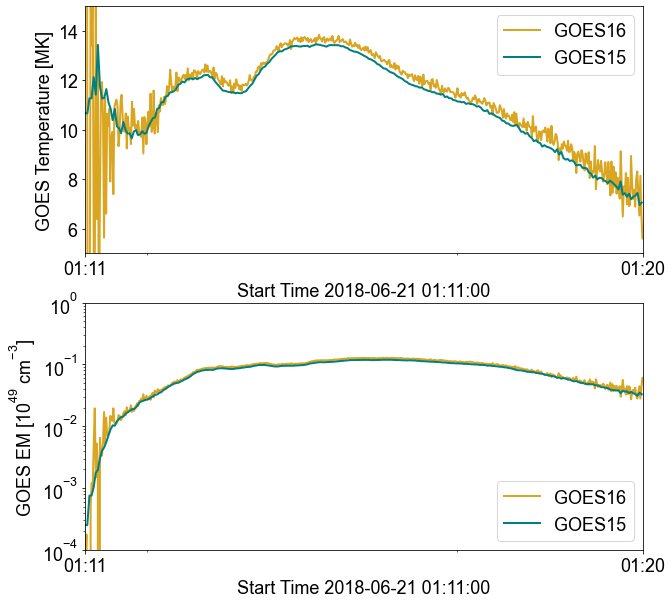

In [5]:
# Plot background subtracted for whole time range
fig= plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 1, 1)
plt.plot(tg16_tims,tmk16,marker=None,color='goldenrod',lw=2,label='GOES16')
plt.plot(tg15_tims,tmk15,marker=None,color='teal',lw=2,label='GOES15')
ax1.set_ylabel("GOES Temperature [MK]")
ax1.set_xlabel("Start Time "+trange.start.iso[:-4])
ax1.set_ylim([5,15])
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
ax1.set_xlim([trange.start.datetime,trange.end.datetime])
myFmt = matplotlib.dates.DateFormatter('%H:%M')
majorx= matplotlib.dates.MinuteLocator(interval=45)
minorx= matplotlib.dates.MinuteLocator(interval=5)
ax1.xaxis.set_major_locator(majorx)
ax1.xaxis.set_minor_locator(minorx)
ax1.xaxis.set_major_formatter(myFmt)
plt.legend()

ax2 = fig.add_subplot(2, 1, 2)
plt.plot(tg16_tims,em16*1e-49,marker=None,color='goldenrod',lw=2,label='GOES16')
plt.plot(tg15_tims,em15*1e-49,marker=None,color='teal',lw=2,label='GOES15')
ax2.set_ylabel("GOES EM [$10^{49}\;cm^{-3}$]")
ax2.set_xlabel("Start Time "+trange.start.iso[:-4])
ax2.set_ylim([1e-4,1e0])
ax2.set_yscale("log")
ax2.set_xlim([trange.start.datetime,trange.end.datetime])
myFmt = matplotlib.dates.DateFormatter('%H:%M')
majorx= matplotlib.dates.MinuteLocator(interval=45)
minorx= matplotlib.dates.MinuteLocator(interval=5)
ax2.xaxis.set_major_locator(majorx)
ax2.xaxis.set_minor_locator(minorx)
ax2.xaxis.set_major_formatter(myFmt)
plt.legend()
plt.show()


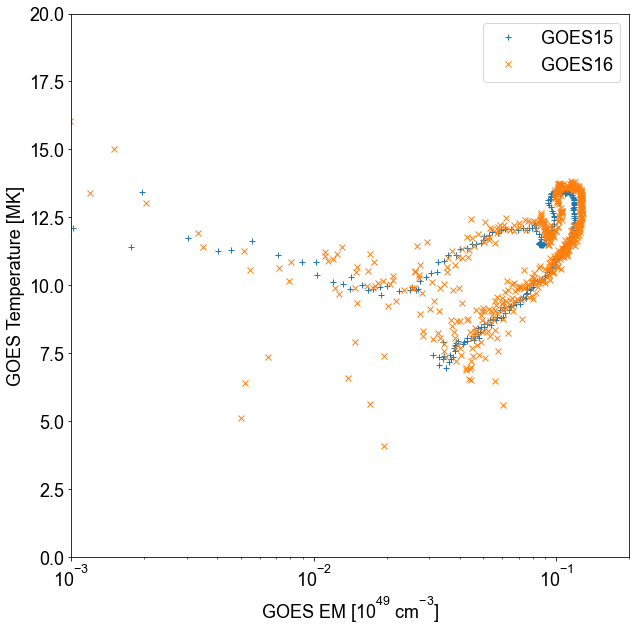

In [6]:
fig= plt.figure(figsize=(10, 10))

plt.plot(em15*1e-49,tmk15,'+',label='GOES15')
plt.plot(em16*1e-49,tmk16,'x',label='GOES16')
plt.xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
plt.ylabel("GOES Temperature [MK]")
plt.xscale('log')
plt.ylim([0,20])
plt.xlim([1e-3,2e-1])
plt.legend()
plt.show()

In [7]:
# try GOES16 avg1min
fn16_1=outdir+"sci_xrsf-l2-avg1m_g16_d20180621_v2-1-0.nc"

g16_1 = ts.TimeSeries(fn16_1, concatenate=True)
tg16_1=g16_1.truncate(trange.start.iso,trange.end.iso)
tg16_1_tims=tg16_1.index
tg16_1_x05=tg16_1.quantity("xrsa").value
tg16_1_x18=tg16_1.quantity("xrsb").value

tbckg16_1=g16_1.truncate(tbck.start.iso,tbck.end.iso)
bck16_1_05=np.mean(tbckg16_1.quantity("xrsa").value)
bck16_1_18=np.mean(tbckg16_1.quantity("xrsb").value)
print(bck16_1_05,bck16_1_18)

tmk16_1, em16_1=gtem.get_tem(tg16_1_x18-bck16_1_18,tg16_1_x05-bck16_1_05,sat=16)


6.5458643e-09 1.3031533e-07


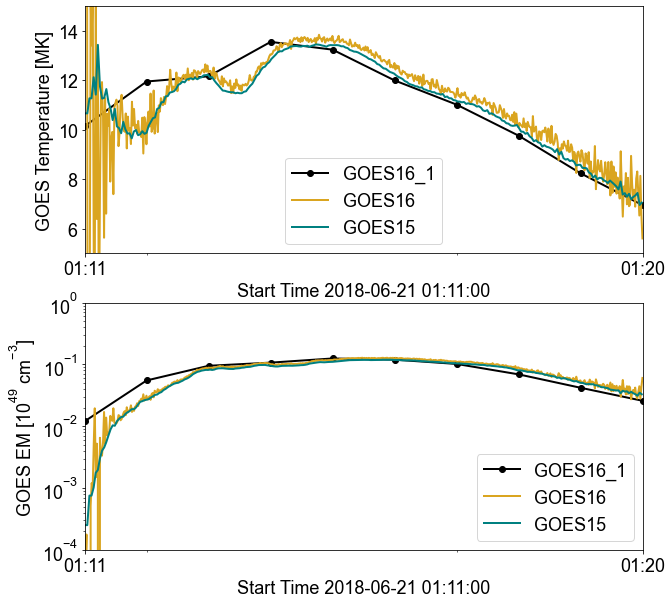

In [8]:
# Plot background subtracted for whole time range
fig= plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 1, 1)
plt.plot(tg16_1_tims,tmk16_1,marker='o',color='black',lw=2,label='GOES16_1')
plt.plot(tg16_tims,tmk16,marker=None,color='goldenrod',lw=2,label='GOES16')
plt.plot(tg15_tims,tmk15,marker=None,color='teal',lw=2,label='GOES15')
ax1.set_ylabel("GOES Temperature [MK]")
ax1.set_xlabel("Start Time "+trange.start.iso[:-4])
ax1.set_ylim([5,15])
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
ax1.set_xlim([trange.start.datetime,trange.end.datetime])
myFmt = matplotlib.dates.DateFormatter('%H:%M')
majorx= matplotlib.dates.MinuteLocator(interval=45)
minorx= matplotlib.dates.MinuteLocator(interval=5)
ax1.xaxis.set_major_locator(majorx)
ax1.xaxis.set_minor_locator(minorx)
ax1.xaxis.set_major_formatter(myFmt)
plt.legend()

ax2 = fig.add_subplot(2, 1, 2)
plt.plot(tg16_1_tims,em16_1*1e-49,marker='o',color='black',lw=2,label='GOES16_1')
plt.plot(tg16_tims,em16*1e-49,marker=None,color='goldenrod',lw=2,label='GOES16')
plt.plot(tg15_tims,em15*1e-49,marker=None,color='teal',lw=2,label='GOES15')
ax2.set_ylabel("GOES EM [$10^{49}\;cm^{-3}$]")
ax2.set_xlabel("Start Time "+trange.start.iso[:-4])
ax2.set_ylim([1e-4,1e0])
ax2.set_yscale("log")
ax2.set_xlim([trange.start.datetime,trange.end.datetime])
myFmt = matplotlib.dates.DateFormatter('%H:%M')
majorx= matplotlib.dates.MinuteLocator(interval=45)
minorx= matplotlib.dates.MinuteLocator(interval=5)
ax2.xaxis.set_major_locator(majorx)
ax2.xaxis.set_minor_locator(minorx)
ax2.xaxis.set_major_formatter(myFmt)
plt.legend()
plt.show()
